# AI for Image Classification

Today, we're going to be building an AI that is pretty good at identifying which breed of cat or dog is in the picture!
We're going to use a library called [fast.ai](https://www.fast.ai/) that is a high-level tool for a type of machine learning called **deep learning**.
If this is fun for you, their free courses are highly recommended!

We'll be training a ML model to do the task of classificaiton with images of pets.
This means that images belong to one of many categories of pets, and our model's job is learn which category is the right one!
We'll see that we can do this pretty well in 20-30 minutes!

In [2]:
# Import libraries
from fastai import *
from fastai.vision import *
import warnings
import requests
from io import BytesIO

warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# Download the data
path = untar_data(URLs.PETS)
img_files = get_image_files(path/'images')
img_files[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_5.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_160.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_125.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_48.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_83.jpg')]

In [4]:
# Create a function that tells us the category of the image from the image filename
def label_func(pth):
  return ' '.join(Path(pth).stem.split('_')[:-1])

In [5]:
# Create an object that can feed data to the model the way it likes
databunch = ImageDataBunch.from_name_func(path=path, fnames=img_files, label_func=label_func, ds_tfms=get_transforms(), size=224, bs=64).normalize(imagenet_stats)

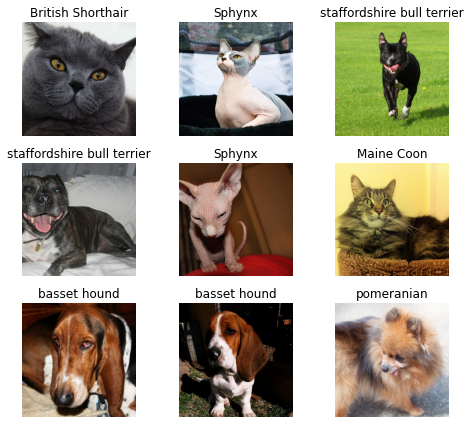

In [6]:
# Take a look at a few images and their categories!
databunch.show_batch(rows=3, figsize=(7,6))

In [7]:
# Create the machine learning model
learn = cnn_learner(data=databunch, base_arch=models.resnet34, metrics=[error_rate, accuracy]).to_fp16()

What does our model look like?

We are useing a model called ResNet 34, which is the top one in this figure.
This model is close to state-of-the-art for image classification!
If you're interested in learning how the guts of this model works, again the fast.ai classes are fantastic!
But don't need to focus on that for now.
Let's teach it how to classify pets!

![](https://miro.medium.com/max/1400/1*S3TlG0XpQZSIpoDIUCQ0RQ.jpeg)

In [8]:
# Set how fast we want the model to learn. Too fast or too slow and it won't work!
LR = 1e-2

In [9]:
# Train a little bit
learn.fit_one_cycle(10, LR)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.088220,0.315012,0.103518,0.896482,01:20
1,0.694138,0.780157,0.200271,0.799729,01:20
2,0.873485,0.773526,0.207713,0.792287,01:20
3,0.782009,0.582945,0.168471,0.831529,01:20
4,0.605033,0.560282,0.157645,0.842355,01:20
5,0.468036,0.418914,0.124493,0.875507,01:20
6,0.348673,0.267340,0.091340,0.908660,01:20
7,0.265684,0.227010,0.078484,0.921516,01:19
8,0.194870,0.208629,0.073072,0.926928,01:19
9,0.177168,0.202893,0.067659,0.932341,01:20


In [10]:
# Unfreeze the model
learn.unfreeze()

In [11]:
# Train even more!
learn.fit_one_cycle(10, slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.170212,0.200546,0.072395,0.927605,01:22
1,0.156881,0.198394,0.066982,0.933018,01:21
2,0.138418,0.194366,0.067659,0.932341,01:22
3,0.147793,0.190493,0.065629,0.934371,01:22
4,0.130001,0.196954,0.067659,0.932341,01:22
5,0.112534,0.194693,0.069012,0.930988,01:22
6,0.113146,0.188850,0.064276,0.935724,01:21
7,0.109555,0.186277,0.062923,0.937077,01:22
8,0.099414,0.184087,0.061570,0.938430,01:22
9,0.092781,0.184437,0.060893,0.939107,01:22


How did we do?

In [12]:
interp = ClassificationInterpretation.from_learner(learn)


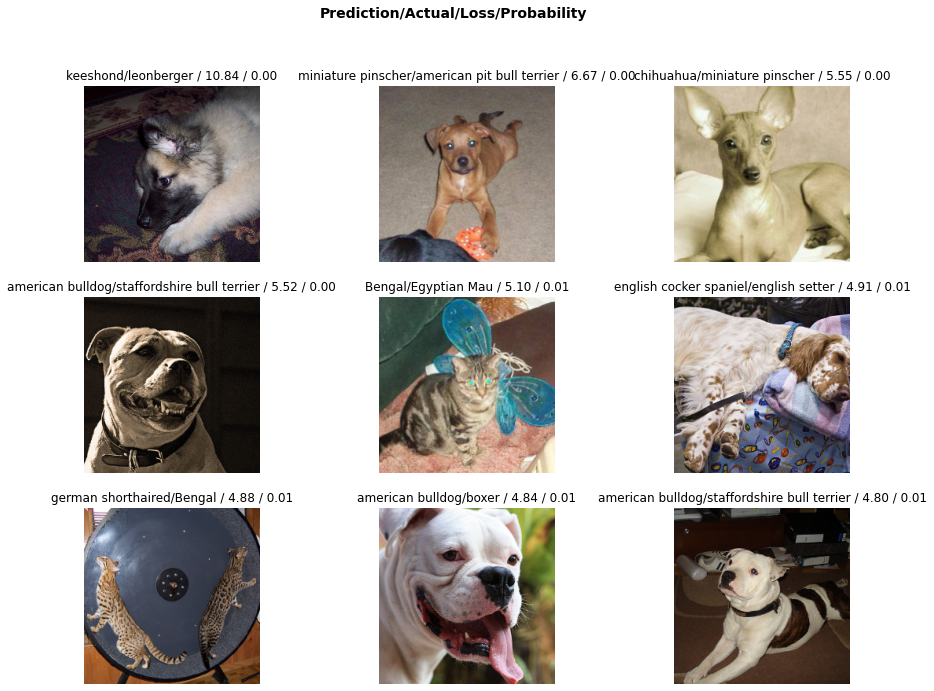

In [13]:
interp.plot_top_losses(9, figsize=(15,11))

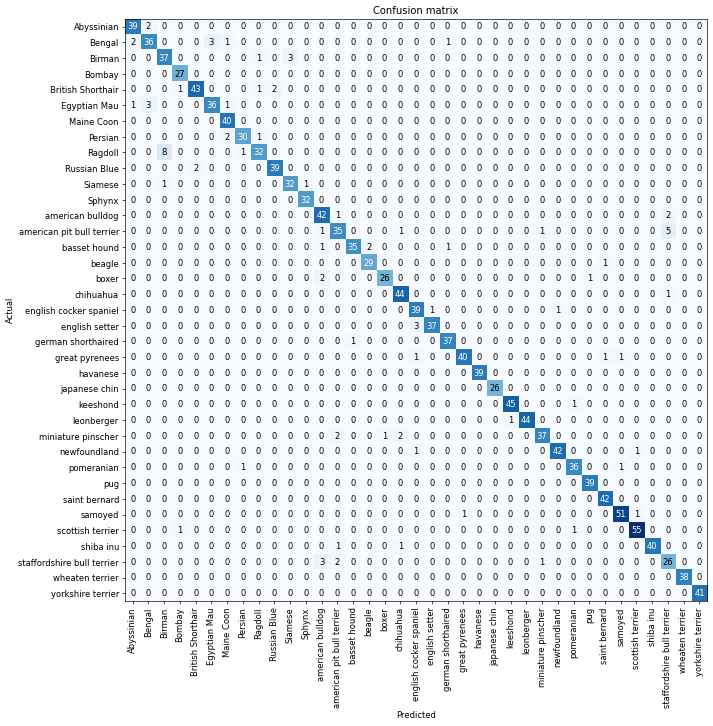

In [14]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [21]:
def image_from_url(url):
  return open_image(BytesIO(requests.get(url).content))
def predict(img, learn):
  _, cat_idx, probas = learn.predict(img)
  category = learn.data.classes[int(cat_idx)]
  proba = float(probas[cat_idx])
  print(f"We predicted this pet is a {category} with probability {100*proba:.02f}%")

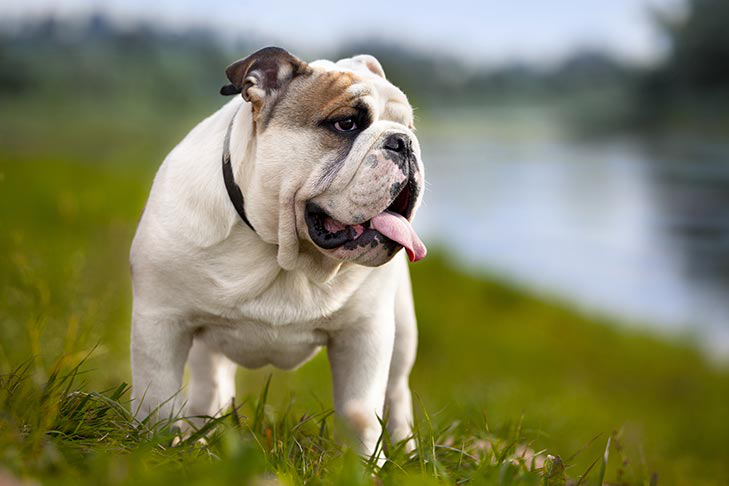

In [24]:
img = image_from_url('https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/11234019/Bulldog-standing-in-the-grass.jpg')
img

In [25]:
predict(img, learn)

We predicted this pet is a american bulldog with probability 99.98%
